# cab_fare_pridicton

In [819]:
#loading important libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [825]:
#changing the directory according to need
os.chdir("D:\gaggi")
os.getcwd()

'D:\\gaggi'

In [826]:
#loading data both test and train.
cab_data=pd.read_csv('train_cab.csv')
cab_data_test =pd.read_csv('test.csv')

In [827]:
#starting intial analysis on data 
#number of rows and columns
cab_data.shape

(16067, 7)

In [828]:
cab_data_test.shape

(9914, 6)

In [829]:
#so we have 16067 records in train data and 9914 records in test data initially
#viewing first 5 rows of the data
cab_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [830]:
#lets check dtypes for train data
cab_data.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [831]:
#fare amount has to be converted to float for analysis
#fare value "430-" is to be cleaned before to convert it in numerical data type
cab_data["fare_amount"]=cab_data["fare_amount"].str.replace("430-","430")
cab_data["fare_amount"]=cab_data["fare_amount"].astype(float)

In [832]:
#checking again
cab_data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [833]:
cab_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.040871,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.459997,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [834]:
 #from above analysis we can draw few insights about data.
    #there are missing values in the data
    #max fare "54343" and max pessenger"5345" sounds absard for a cab
#continuing further analysis for test data as well.
cab_data_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [835]:
#data types for test daya seems apt
#test data looks okay at 1st glance no missing values no visable outliers as of now
cab_data_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


UNIVARIAT analysis

In [836]:
#lets start with passenger_count as observed it consists of outliers.
# from common understanding a cab cannot have max passanger count more than 6.
#we should consider max passanger count as 6
#also 0 passanger also sounds absard.
#pessenger should always be an whole number so all with desimal pessenger are also outliers.
cab_data["passenger_count"][cab_data["passenger_count"]>6].count()

20

In [837]:
cab_data["passenger_count"][cab_data["passenger_count"]<1].count()

58

In [838]:
#there ares some odd 78 outliers in passenger_count column .
#we could treat the outliers in 2 posible ways 11 droping them completly along with whole row 
#second we can convert them into NA values and treat them as missing values. that is populating them baised on data left
#we are using second way as it results in less loss of data
#there are already missing values present int passenger_count column thus we will be deaaling with all missing values at once.
cab_data["passenger_count"].isnull().sum()

55

In [839]:
#coverting into NA
cab_data["passenger_count"].loc[cab_data["passenger_count"]>6]=np.nan
cab_data["passenger_count"].loc[cab_data["passenger_count"]<1]=np.nan

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [840]:
cab_data["passenger_count"].describe()

count    15934.000000
mean         1.649636
std          1.265896
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [841]:
#Fare_ammount
cab_data["fare_amount"].describe()

count    16043.000000
mean        15.040871
std        430.459997
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [842]:
#initial analysis tells us that even fare ammount variable consists of missing values
#there are absard outliers also like fare cannot be negative
#also 54343$ for a cab fare is absard
# again we would convert the outliers into missing values to avaoid any data loss or atleast minimize it
# doing some research we are considering the max fare as $300 and min fare to be $2.5
cab_data["fare_amount"][cab_data["fare_amount"]<2.5].count()

6

In [843]:
cab_data["fare_amount"][cab_data["fare_amount"]>300].count()

5

In [844]:
#there are around 11 odd outliers lets convert them to NA
cab_data["fare_amount"].loc[cab_data["fare_amount"]<2.5]=np.nan
cab_data["fare_amount"].loc[cab_data["fare_amount"]>300]=np.nan

In [845]:
cab_data["fare_amount"].isnull().sum()

35

In [846]:
#we have 35 missing values in fare ammount
cab_data["fare_amount"].describe()

count    16032.000000
mean        11.308941
std          9.649141
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [847]:
#continuing with distance data i.e longitude and longitude
#intial analysis gives (00)latitude longitude on googling seems absard as it is somewher in the otion thats not fissable for cab to pickup and dropof 
#0 value lat long would be outliers wich have to be treated
#also we need to consider gernal otliers regarding min and max lat longitude
#ther might be an posibility of inversion of latitude and longitude in the data
cab_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16032.000000,16067.000000,16067.000000,16067.000000,16067.000000,15934.000000
mean,11.308941,-72.462787,39.914725,-72.462328,39.897906,1.649636
std,9.649141,10.578384,6.826587,10.575062,6.187087,1.265896
min,2.500000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [848]:
#lets find the the min max rnge for latitude and longitude from test data as it is almost free from any outliers
#max and min longitude from test data
lon_min=min(cab_data_test.pickup_longitude.min(),cab_data_test.dropoff_longitude.min())
lon_max=max(cab_data_test.pickup_longitude.max(),cab_data_test.dropoff_longitude.max())
print(lon_min,',',lon_max)

-74.263242 , -72.986532


In [849]:
#max and min longitude from test data
lat_min=min(cab_data_test.pickup_latitude.min(),cab_data_test.dropoff_latitude.min())
lat_max=max(cab_data_test.pickup_latitude.max(),cab_data_test.dropoff_latitude.max())
print(lat_min,',',lat_max)

40.568973 , 41.709555


In [850]:
#let us find outliers on bases of this range
def select_outside_boundingbox(df, BB):
    filter_df = df.loc[(df['pickup_longitude'] < BB[0]) | (df['pickup_longitude'] > BB[1]) | \
           (df['pickup_latitude'] < BB[2]) | (df['pickup_latitude'] > BB[3]) | \
           (df['dropoff_longitude'] < BB[0]) | (df['dropoff_longitude'] > BB[1]) | \
           (df['dropoff_latitude'] < BB[2]) | (df['dropoff_latitude'] > BB[3])]
    
    return filter_df


BB = (-74.5, -72.8, 40.5, 41.8)

In [851]:
latlon_outliers = select_outside_boundingbox(cab_data, BB)
latlon_outliers.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3.0
15,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1.0
26,NaN,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1.0
124,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2.0
192,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5.0


In [852]:
latlon_outliers.shape

(348, 7)

In [853]:
#aroound 348 outliers exist in lat long
#lets further our analysis
latlon_outliers.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,346.000000,348.000000,348.000000,348.000000,348.000000,344.000000
mean,11.697514,-4.164561,2.125611,-4.188082,1.326309,1.613372
std,11.702505,19.982603,26.339887,19.985379,15.723119,1.265808
min,2.500000,-74.129877,-74.006893,-74.136677,-74.006377,1.000000
25%,5.700000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.100000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,128.830000,40.766125,401.083332,40.802437,40.796543,6.000000


In [854]:
#lets first deal with zeros in lat and long data
#we are deleting all zero as the zero cordinate lies in ocean thats absard in tiself for a cab to travel
def drop_0s(df, verbose=False):
    if verbose:
        print("Dropping all rows with 0s:")
        old_size = len(df)
        print("Old size: {}".format(old_size))

    df = df.loc[~(df == 0).any(axis=1)]
    

    if verbose:
        new_size = len(df)
        print("New size: {}".format(new_size))
        difference = old_size - new_size
        percent = (difference / old_size) * 100
        print("Dropped {} records, or {:.2f}%".format(difference, percent))
    
    return df

latlon_outliers = drop_0s(latlon_outliers, True)

latlon_outliers.describe()

Dropping all rows with 0s:
Old size: 348
New size: 22
Dropped 326 records, or 93.68%


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.331818,-28.896314,13.244061,-25.896616,-4.954036,1.681818
std,10.611960,56.084572,102.396210,55.323937,54.600214,1.358794
min,2.900000,-74.129877,-74.006893,-74.136677,-74.006377,1.000000
25%,4.625000,-73.978454,-73.986047,-73.976393,-73.958845,1.000000
50%,9.300000,-73.946170,39.610120,-73.935664,39.604998,1.000000
75%,13.000000,40.734938,40.614940,40.739497,40.278346,2.000000
max,52.000000,40.766125,401.083332,40.802437,40.778927,6.000000


In [855]:
#as we can see many rows have values inverted  for latitude and longitude thesr data rows can be usefull if we could fix this
def select_within_boundingbox(df, BB):
    filter_df = df.loc[(df['pickup_longitude'] >= BB[0]) & (df['pickup_longitude'] <= BB[1]) & \
           (df['pickup_latitude'] >= BB[2]) & (df['pickup_latitude'] <= BB[3]) & \
           (df['dropoff_longitude'] >= BB[0]) & (df['dropoff_longitude'] <= BB[1]) & \
           (df['dropoff_latitude'] >= BB[2]) & (df['dropoff_latitude'] <= BB[3])]
    
    
    return filter_df

inverted_BB = (40.5, 41.8, -74.5, -72.8)

inverted_outliers = select_within_boundingbox(latlon_outliers, inverted_BB)

inverted_outliers.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,16.375000,40.747089,-73.991207,40.752877,-73.973476,1.875000
std,14.882276,0.017046,0.011292,0.024100,0.022082,1.726888
min,5.000000,40.719830,-74.006893,40.723305,-74.006377,1.000000
25%,9.875000,40.734938,-73.996263,40.739497,-73.982855,1.000000
50%,13.000000,40.749922,-73.990153,40.748894,-73.978158,1.000000
75%,15.125000,40.761476,-73.986047,40.759992,-73.958845,2.000000
max,52.000000,40.766125,-73.973047,40.802437,-73.939430,6.000000


In [856]:
def swap_inverted(df):
    fixed_df = df.rename(columns={'pickup_longitude' : 'pickup_latitude', 'pickup_latitude' : 'pickup_longitude',
                                                       'dropoff_longitude' : 'dropoff_latitude', 'dropoff_latitude' : 'dropoff_longitude'})
    col_list = fixed_df.columns.tolist()
    
    col_list[3], col_list[4], col_list[5], col_list[6] = col_list[4], col_list[3], col_list[6], col_list[5]
    
    fixed_df = fixed_df[col_list]
    
    return fixed_df

fixed_outliers = swap_inverted(inverted_outliers)

fixed_outliers.describe()

,fare_amount,pickup_latitude,dropoff_latitude,pickup_longitude,passenger_count,dropoff_longitude
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,16.375000,40.747089,40.752877,-73.991207,1.875000,-73.973476
std,14.882276,0.017046,0.024100,0.011292,1.726888,0.022082
min,5.000000,40.719830,40.723305,-74.006893,1.000000,-74.006377
25%,9.875000,40.734938,40.739497,-73.996263,1.000000,-73.982855
50%,13.000000,40.749922,40.748894,-73.990153,1.000000,-73.978158
75%,15.125000,40.761476,40.759992,-73.986047,2.000000,-73.958845
max,52.000000,40.766125,40.802437,-73.973047,6.000000,-73.939430


In [858]:
## Now we'll remove all rows with a datapoint that doesn't fall within the bounding box for NYC coordinates

print("Old size: {}".format(len(cab_data)))

cab_data =cab_data.loc[(cab_data['pickup_longitude'] >= BB[0]) & (cab_data['pickup_longitude'] <= BB[1]) & \
           (cab_data['pickup_latitude'] >= BB[2]) & (cab_data['pickup_latitude'] <= BB[3]) & \
           (cab_data['dropoff_longitude'] >= BB[0]) & (cab_data['dropoff_longitude'] <= BB[1]) & \
           (cab_data['dropoff_latitude'] >= BB[2]) & (cab_data['dropoff_latitude'] <= BB[3])]
    

print("New size: {}".format(len(cab_data)))

cab_data.describe()

Old size: 16067
New size: 15719


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15686.000000,15719.000000,15719.000000,15719.000000,15719.000000,15590.000000
mean,11.300370,-73.974829,40.751332,-73.973838,40.751835,1.650436
std,9.599172,0.041491,0.031504,0.039362,0.033457,1.265927
min,2.500000,-74.438233,40.500046,-74.429332,40.500046,1.000000
25%,6.000000,-73.992401,40.736604,-73.991377,40.736325,1.000000
50%,8.500000,-73.982060,40.753340,-73.980577,40.754255,1.000000
75%,12.500000,-73.968128,40.767805,-73.965399,40.768331,2.000000
max,180.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000


In [733]:
#concatinating the filtered otliers with the data
cab_data_copy = cab_data # Created a copy so as to avoid the possibility of adding the fixed outliers multiple times

cab_data = pd.concat([cab_data_copy, fixed_outliers],ignore_index=True,sort=True)

cab_data_copy = None  # Doing this to try to be a bit more memory efficient

cab_data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude
count,15727.000000,15727.000000,15694.000000,15598.000000,15727.000000,15727.000000
mean,40.751836,-73.973838,11.302957,1.650551,40.751329,-73.974837
std,0.033453,0.039354,9.602555,1.266141,0.031499,0.041483
min,40.500046,-74.429332,2.500000,1.000000,40.500046,-74.438233
25%,40.736333,-73.991377,6.000000,1.000000,40.736604,-73.992402
50%,40.754255,-73.980572,8.500000,1.000000,40.753326,-73.982076
75%,40.768322,-73.965396,12.500000,2.000000,40.767803,-73.968134
max,41.366138,-73.137393,180.000000,6.000000,41.366138,-73.137393


In [734]:
cab_data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude
count,15727.000000,15727.000000,15694.000000,15598.000000,15727.000000,15727.000000
mean,40.751836,-73.973838,11.302957,1.650551,40.751329,-73.974837
std,0.033453,0.039354,9.602555,1.266141,0.031499,0.041483
min,40.500046,-74.429332,2.500000,1.000000,40.500046,-74.438233
25%,40.736333,-73.991377,6.000000,1.000000,40.736604,-73.992402
50%,40.754255,-73.980572,8.500000,1.000000,40.753326,-73.982076
75%,40.768322,-73.965396,12.500000,2.000000,40.767803,-73.968134
max,41.366138,-73.137393,180.000000,6.000000,41.366138,-73.137393


In [735]:
#after dealing with latitude longitude data lts first trat missing values in the pessanger and fare variables
cab_data.isnull().sum()

dropoff_latitude       0
dropoff_longitude      0
fare_amount           33
passenger_count      129
pickup_datetime        0
pickup_latitude        0
pickup_longitude       0
dtype: int64

In [736]:
#creating adata frame missing
missing_val= pd.DataFrame(cab_data.isnull().sum())

In [737]:
#reseting the index
missing_val = missing_val.reset_index()
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(cab_data))*100
missing_val

,Variables,Missing_percentage
0,dropoff_latitude,0.000000
1,dropoff_longitude,0.000000
2,fare_amount,0.209830
3,passenger_count,0.820245
4,pickup_datetime,0.000000
5,pickup_latitude,0.000000
6,pickup_longitude,0.000000


In [738]:
#there are 0.2 percent and 0.8 percent missing values in fare and passenger respectively
#creating copy of cab data for imputation purpose
df1= cab_data.copy()
df2= cab_data.copy()
df3= cab_data.copy()

In [739]:
df1.iloc[6,2]

7.5

In [740]:
df1.iloc[6,2]=np.nan
df2.iloc[6,2]=np.nan
df3.iloc[6,2]=np.nan

In [741]:
df1.iloc[6,2]

nan

In [742]:
#using mean method 
df1['fare_amount'] = df1['fare_amount'].fillna(df1['fare_amount'].mean())
df1.iloc[6,2]

11.303199515707629

In [743]:
#using median method
df2['fare_amount'] = df2['fare_amount'].fillna(df2['fare_amount'].median())
df2.iloc[6,2]

8.5

In [744]:
#using interpolat
df3['fare_amount'] = df3['fare_amount'].interpolate(method = 'nearest', limit_direction = 'both')
df3.iloc[6,2]

12.1

In [745]:
#usinng median methord for imputation of passenger variable and fare variable
cab_data.fillna(cab_data.median(), inplace = True)

In [746]:
#checking missing values again
cab_data.isnull().sum()

dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_datetime      0
pickup_latitude      0
pickup_longitude     0
dtype: int64

In [747]:
#this concludes 1st phase of data cleaning
#lets start ourEDA for the data
#lets stars by converting pickup date timestamp to different other usefull columns
#also lets apply feature enginnering to check and convert variables to right data format
cab_data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude
count,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000,15727.000000
mean,40.751836,-73.973838,11.297076,1.645215,40.751329,-73.974837
std,0.033453,0.039354,9.593332,1.262302,0.031499,0.041483
min,40.500046,-74.429332,2.500000,1.000000,40.500046,-74.438233
25%,40.736333,-73.991377,6.000000,1.000000,40.736604,-73.992402
50%,40.754255,-73.980572,8.500000,1.000000,40.753326,-73.982076
75%,40.768322,-73.965396,12.500000,2.000000,40.767803,-73.968134
max,41.366138,-73.137393,180.000000,6.000000,41.366138,-73.137393


In [748]:
 cab_data.dtypes

dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
passenger_count      float64
pickup_datetime       object
pickup_latitude      float64
pickup_longitude     float64
dtype: object

In [749]:
#lets check for test data also
cab_data["pickup_datetime"]=cab_data["pickup_datetime"].str.replace("UTC","")
cab_data_test["pickup_datetime"]=cab_data_test["pickup_datetime"].str.replace("UTC","")
cab_data_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [750]:
cab_data["passenger_count"]=cab_data["passenger_count"].astype(int)
cab_data['pickup_datetime']  = pd.to_datetime(cab_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
cab_data_test['pickup_datetime']  = pd.to_datetime(cab_data_test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [751]:
cab_data.dtypes

dropoff_latitude            float64
dropoff_longitude           float64
fare_amount                 float64
passenger_count               int32
pickup_datetime      datetime64[ns]
pickup_latitude             float64
pickup_longitude            float64
dtype: object

In [752]:
cab_data_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [753]:
cab_data.isnull().sum()

dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_datetime      1
pickup_latitude      0
pickup_longitude     0
dtype: int64

In [754]:
#drop the missing values
cab_data = cab_data.drop(cab_data[cab_data.isnull().any(1)].index, axis = 0)

 Now, for EDA. The following are my considerations -

Does the number of passengers affect the fare?
Does the date and time of pickup affect the fare?
Does the day of the week affect the fare?
Does the distance travelled affect the fare?
First, let's split the datetime field 'pickup_datetime' to the following -

year
month
date
hour
day of week
Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.
We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

In [755]:
def prepare_time_features(df, drop=False):
    df["hour"] = df.pickup_datetime.dt.hour
    df["day_of_week"] = df.pickup_datetime.dt.weekday
    df["day_of_month"] = df.pickup_datetime.dt.day
    df["week"] = df.pickup_datetime.dt.week
    df["month"] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year - 2000  # Reducing to 2 digits for less memory usage

    if drop:
        df.drop(columns=['pickup_datetime'], inplace=True)
    

        
    return df

cab_data= prepare_time_features(cab_data, True)

cab_data_test = prepare_time_features(cab_data_test, True)

In [756]:
cab_data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,hour,day_of_week,day_of_month,week,month,year
count,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000
mean,40.751835,-73.973837,11.297063,1.645237,40.751331,-73.974837,13.503179,3.032049,15.669337,25.453580,6.265230,11.735216
std,0.033454,0.039355,9.593636,1.262339,0.031499,0.041485,6.506660,1.969914,8.682774,14.998628,3.447639,1.866983
min,40.500046,-74.429332,2.500000,1.000000,40.500046,-74.438233,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000
25%,40.736332,-73.991377,6.000000,1.000000,40.736615,-73.992403,9.000000,1.000000,8.000000,13.000000,3.000000,10.000000
50%,40.754254,-73.980571,8.500000,1.000000,40.753333,-73.982077,14.000000,3.000000,16.000000,24.000000,6.000000,12.000000
75%,40.768326,-73.965396,12.500000,2.000000,40.767803,-73.968132,19.000000,5.000000,23.000000,39.000000,9.000000,13.000000
max,41.366138,-73.137393,180.000000,6.000000,41.366138,-73.137393,23.000000,6.000000,31.000000,53.000000,12.000000,15.000000


In [757]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [cab_data, cab_data_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [758]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [759]:
cab_data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,hour,day_of_week,day_of_month,week,month,year,H_Distance
count,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000,15726.000000
mean,40.751835,-73.973837,11.297063,1.645237,40.751331,-73.974837,13.503179,3.032049,15.669337,25.453580,6.265230,11.735216,3.370802
std,0.033454,0.039355,9.593636,1.262339,0.031499,0.041485,6.506660,1.969914,8.682774,14.998628,3.447639,1.866983,4.120224
min,40.500046,-74.429332,2.500000,1.000000,40.500046,-74.438233,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000,0.000000
25%,40.736332,-73.991377,6.000000,1.000000,40.736615,-73.992403,9.000000,1.000000,8.000000,13.000000,3.000000,10.000000,1.256924
50%,40.754254,-73.980571,8.500000,1.000000,40.753333,-73.982077,14.000000,3.000000,16.000000,24.000000,6.000000,12.000000,2.170010
75%,40.768326,-73.965396,12.500000,2.000000,40.767803,-73.968132,19.000000,5.000000,23.000000,39.000000,9.000000,13.000000,3.894625
max,41.366138,-73.137393,180.000000,6.000000,41.366138,-73.137393,23.000000,6.000000,31.000000,53.000000,12.000000,15.000000,101.094619


In [760]:
cab_data_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,week,month,year,H_Distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,13.467420,2.852834,16.194170,28.161892,6.857979,11.815816,3.435371
std,0.042774,0.033541,0.039072,0.035435,1.278747,6.868584,1.994451,8.838482,14.523575,3.353272,1.803347,3.972374
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,8.000000,1.000000,9.000000,17.000000,4.000000,10.000000,1.298277
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,15.000000,3.000000,16.000000,29.000000,7.000000,12.000000,2.217412
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,19.000000,5.000000,25.000000,40.000000,10.000000,14.000000,4.045302
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,23.000000,6.000000,31.000000,53.000000,12.000000,15.000000,99.996040


In [761]:
#as we can see there are some observations with zero distance
#we need to treat them as zero distance is abstract for an costumer to pay fare for
#depending on no of zero observations we would drop them or impute them with help of missing value analysis.
cab_data["H_Distance"][cab_data["H_Distance"]==0].count()

156

In [762]:
cab_data_test["H_Distance"][cab_data_test["H_Distance"]==0].count()

85

In [763]:
#0.9 and 0.8 percent of the data set is having Hdistance as zero this value can be droped
cab_data=cab_data[cab_data["H_Distance"]>0]
cab_data_test=cab_data_test[cab_data_test["H_Distance"]>0]

Text(0, 0.5, 'Frequency')

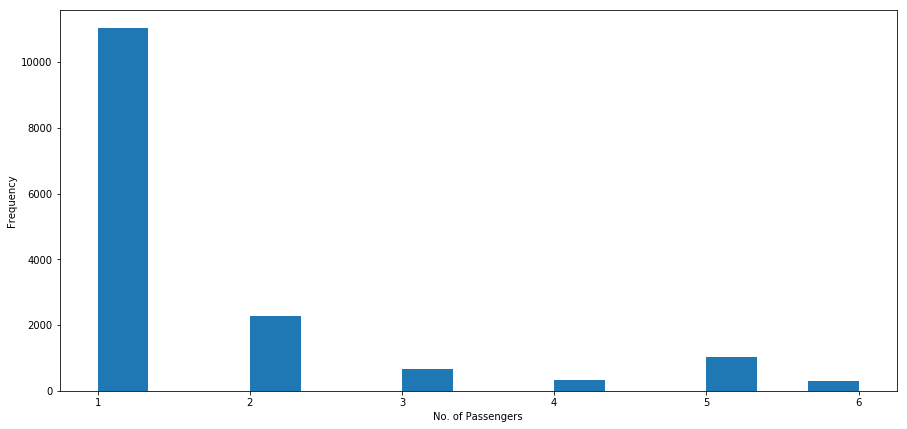

In [764]:
#let us start aalysis between the variables
#Does the number of passengers affect the fare?
plt.figure(figsize=(15,7))
plt.hist(cab_data['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

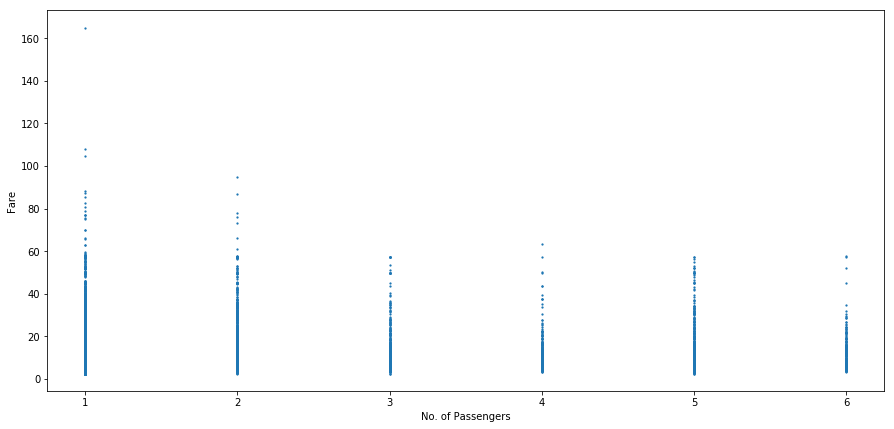

In [765]:
plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['passenger_count'], y=cab_data['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

#From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

Text(0, 0.5, 'Fare')

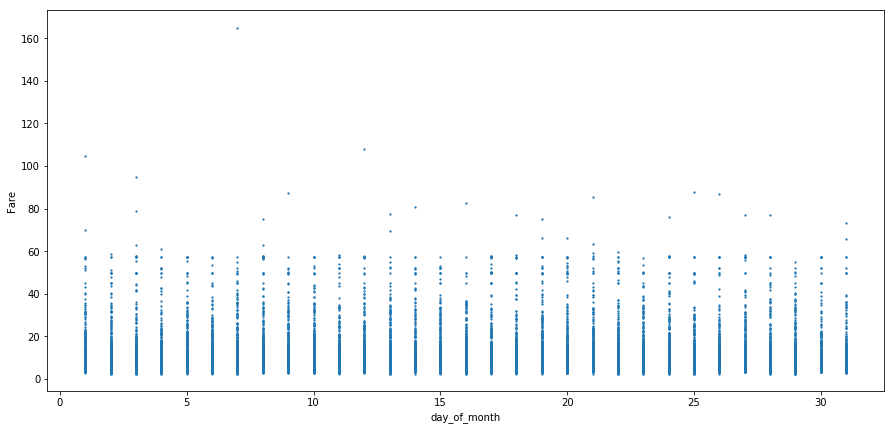

In [766]:
#Does the date and time of pickup affect the fare?
plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['day_of_month'], y=cab_data['fare_amount'], s=1.5)
plt.xlabel('day_of_month')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

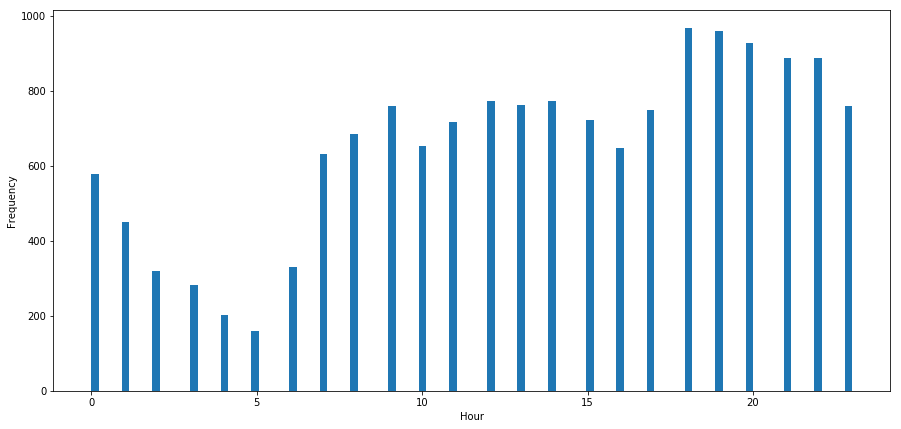

In [767]:
#The fares throught the month mostly seem uniform, with the maximum fare received on the 16th
plt.figure(figsize=(15,7))
plt.hist(cab_data['hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')


Text(0, 0.5, 'Fare')

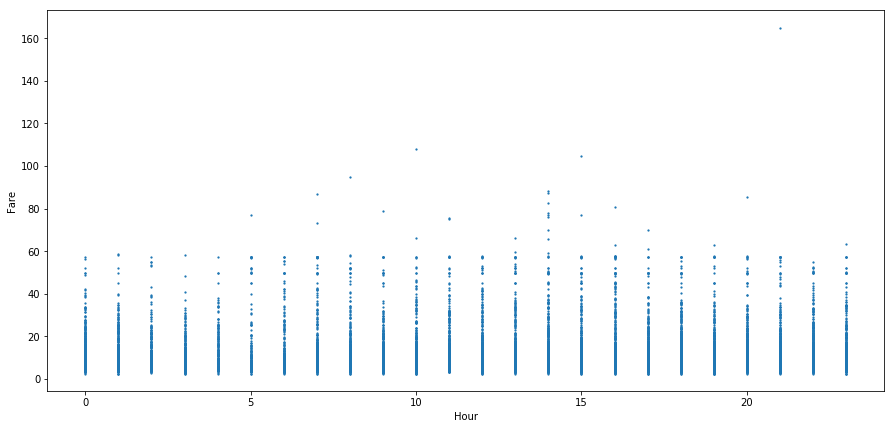

In [768]:
plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['hour'], y=cab_data['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')


Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM
The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?

Text(0, 0.5, 'Frequency')

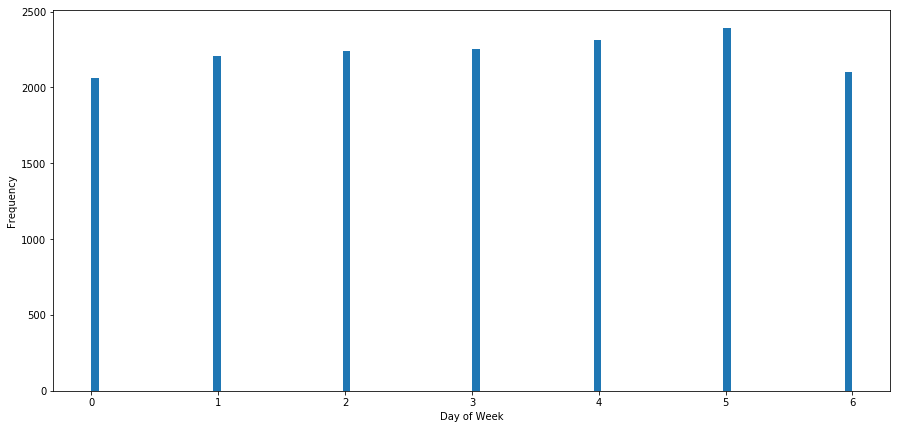

In [769]:
#Does the day of the week affect the fare?
plt.figure(figsize=(15,7))
plt.hist(cab_data['day_of_week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

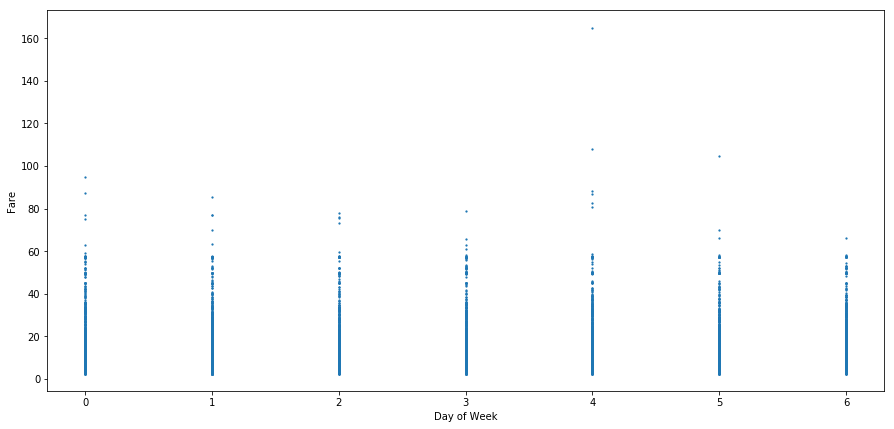

In [770]:
#day of the week doesn't seem to have that much of an influence on the number of cab rides
plt.figure(figsize=(15,7))
plt.scatter(x=cab_data['day_of_week'], y=cab_data['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

#The highest fares seem to be high weekdays  on  and the lowest on  and sunday almost an uniform distibution
4. Does the distance affect the fare?

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Text(0, 0.5, 'Fare')

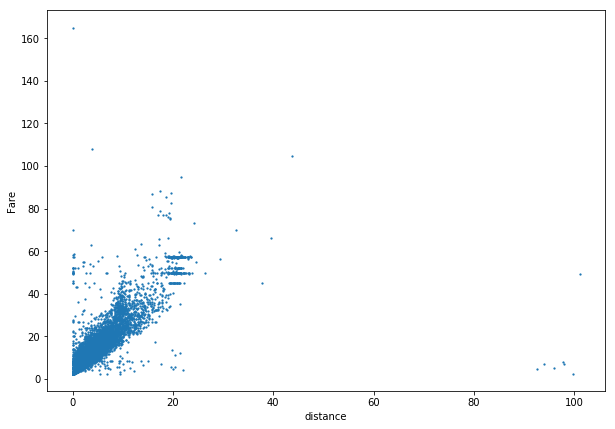

In [771]:
#day of the week doesn't seem to have that much of an influence on the number of cab rides
plt.figure(figsize=(10,7))
plt.scatter(x=cab_data['H_Distance'], y=cab_data['fare_amount'], s=1.5)
plt.xlabel('distance')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

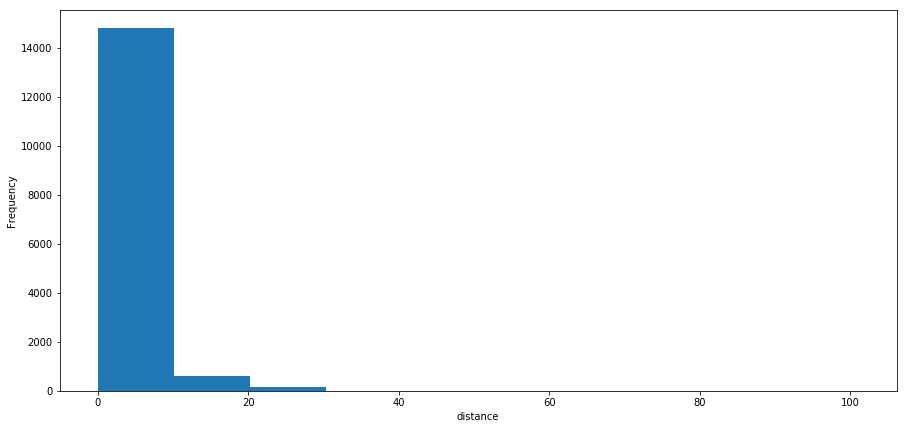

In [772]:
#Does the day of the week affect the fare?
plt.figure(figsize=(15,7))
plt.hist(cab_data['H_Distance'])
plt.xlabel('distance')
plt.ylabel('Frequency')

#fare is directly proportional to the distance with few outliers that cannot be removed because we can think of possible situation like in case of late night and unavalability irrespective of low distance cab charged high fare
#most of the data lie in the bracket of fare between o to 20

# Feature selection

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,hour,day_of_week,day_of_month,week,month,year,H_Distance
dropoff_latitude,1,0.207031,0.144519,0.00377614,0.374562,0.0654771,0.0192099,0.0151573,0.000600593,0.00607006,0.00516605,0.00211637,0.057987
dropoff_longitude,0.207031,1,0.33487,0.00426327,0.05999,0.262401,0.0505424,0.00067268,0.00629073,0.0162644,0.017147,0.00556064,0.394567
fare_amount,0.144519,0.33487,1,0.00870483,0.188378,0.394142,0.0293913,0.00278293,0.00763756,0.0396973,0.041358,0.115673,0.767307
passenger_count,0.00377614,0.00426327,0.00870483,1,0.00573307,0.00150718,0.0176572,0.0421869,0.00176315,0.0111648,0.0094056,0.00255079,0.000233448
pickup_latitude,0.374562,0.05999,0.188378,0.00573307,1,0.125249,0.0361773,0.049207,0.00551491,0.00263375,0.00271425,0.0191803,0.0455561
pickup_longitude,0.0654771,0.262401,0.394142,0.00150718,0.125249,1,0.0210253,0.0380527,0.00275952,0.00369939,0.00495907,0.00677318,0.5195
hour,0.0192099,0.0505424,0.0293913,0.0176572,0.0361773,0.0210253,1,0.0883851,0.000714279,0.00432403,0.00420904,0.00526942,0.0393075
day_of_week,0.0151573,0.00067268,0.00278293,0.0421869,0.049207,0.0380527,0.0883851,1,0.0140327,0.0175755,0.0161068,0.00477613,0.0129446
day_of_month,0.000600593,0.00629073,0.00763756,0.00176315,0.00551491,0.00275952,0.000714279,0.0140327,1,0.0408084,0.0175288,0.0259138,0.0058199
week,0.00607006,0.0162644,0.0396973,0.0111648,0.00263375,0.00369939,0.00432403,0.0175755,0.0408084,1,0.973625,0.124371,0.0185135


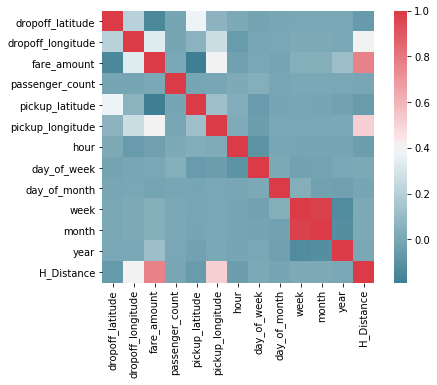

In [773]:
#correlation analysis for numeric variables
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = cab_data.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
# Create correlation matrix
corr_matrix = cab_data.corr().abs()
corr_matrix.style.background_gradient(cmap='GnBu_r')

#from correlation analysis we can drop of day of week and day of month variables as they hav very low  correlation with target variable fare ammount
#also as during above analysis we have already droped pickup date while extracting other variables from it


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,week,month,year,H_Distance
pickup_longitude,1,0.167505,0.31371,0.130764,0.0105762,0.0189693,0.0268096,0.00625769,0.0176209,0.0169242,0.00571657,0.528954
pickup_latitude,0.167505,1,0.1427,0.444648,0.0235318,0.0241912,0.0306391,0.0212845,0.0223248,0.0210635,0.0333778,0.0714421
dropoff_longitude,0.31371,0.1427,1,0.235937,0.0178654,0.0623241,0.0249899,0.0109758,0.0204272,0.0182791,0.0132798,0.309356
dropoff_latitude,0.130764,0.444648,0.235937,1,0.00955993,0.0223828,0.0253852,0.00106414,0.0199351,0.0193404,0.029105,0.119786
passenger_count,0.0105762,0.0235318,0.0178654,0.00955993,1,0.0332818,0.00635001,0.0355267,0.0612535,0.0607393,0.0129831,0.0279968
hour,0.0189693,0.0241912,0.0623241,0.0223828,0.0332818,1,0.129198,0.0483618,0.166698,0.161429,0.0126432,0.0197777
day_of_week,0.0268096,0.0306391,0.0249899,0.0253852,0.00635001,0.129198,1,0.0705047,0.18006,0.165385,0.0147182,0.000615338
day_of_month,0.00625769,0.0212845,0.0109758,0.00106414,0.0355267,0.0483618,0.0705047,1,0.00337627,0.0776814,0.114427,0.00910044
week,0.0176209,0.0223248,0.0204272,0.0199351,0.0612535,0.166698,0.18006,0.00337627,1,0.979438,0.191375,0.0256275
month,0.0169242,0.0210635,0.0182791,0.0193404,0.0607393,0.161429,0.165385,0.0776814,0.979438,1,0.204099,0.0234611


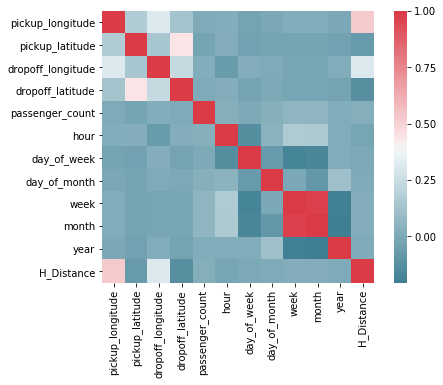

In [774]:
#correlation analysis for numeric variables
#let us do the same analysis for test data
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = cab_data_test.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
# Create correlation matrix
corr_matrix = cab_data_test.corr().abs()
corr_matrix.style.background_gradient(cmap='GnBu_r')

In [775]:
# same conclutions can be drawn for test data thus applying same opperations on test data as well
cab_data=cab_data.drop(["day_of_month","day_of_week"],axis=1)
cab_data_test=cab_data_test.drop(["day_of_month","day_of_week"],axis=1)
print(cab_data.shape)
print(cab_data_test.shape)

(15570, 11)
(9829, 10)


In [776]:
#rearranging the colums for test data
cab_data = cab_data.reindex(columns=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count","hour","week","month","year","H_Distance","fare_amount"])

# Modelling

In [777]:
#for modling lets first crat test and train split out of train data given to us for acuracy
X=cab_data.iloc[:,:10]
Y=cab_data.iloc[:,10].values
print(X.shape)
print(Y.shape)

(15570, 10)
(15570,)


In [803]:
 from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,Y,test_size=0.1,random_state=0)

In [804]:
#applying discetion tree modle for regression first
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
#Decision tree for regression
# Train the model using the training sets
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train_X, train_y)
# make the predictions by the model
predictions_DT = fit_DT.predict(val_X).round(0)
# data frame for actual and predicted values
df_dt = pd.DataFrame({'actual': val_y, 'pred': predictions_DT})
print(df_dt.head())
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs(( y_true - y_pred) / y_true))*100
    return mape
mape=MAPE(val_y, predictions_DT)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# errors and accuracy 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')

   actual  pred
0     5.0   7.0
1     8.0   7.0
2     6.5   7.0
3     3.7   7.0
4     5.5   7.0
MEAN ABSOLUTE ERROR:28.902476909886172%
Accuracy: 71.1 %.


In [815]:
#MEAN ABSOLUTE ERROR:28.902476909886172%
#Accuracy: 71.1 %

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


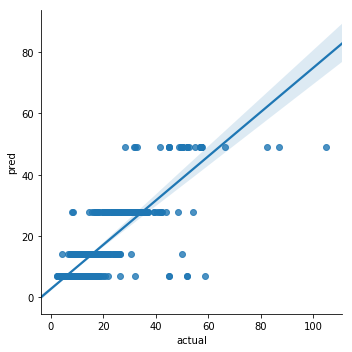

In [805]:
sns.lmplot(x='actual', y='pred', data = df_dt ,fit_reg = True)

In [806]:
# linear 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(train_X, train_y)
#predict
lr_prediction = lr_model.predict(val_X)
df_lr = pd.DataFrame({'actual':val_y, 'prediction':lr_prediction})
# Calculate and display accuracy
mape=MAPE(val_y, lr_prediction)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# errors and accuracy 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')


MEAN ABSOLUTE ERROR:28.29157149054831%
Accuracy: 71.71 %.


In [816]:
#MEAN ABSOLUTE ERROR:28.29157149054831%
#Accuracy: 71.71 %

In [807]:
# Linear Regression OLS
#Import libraries for LR
import statsmodels.api as sm
# Train the model using the training sets
model = sm.OLS(train_y,train_X.astype(float)).fit()

In [808]:
#Summary of model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     7174.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:28:36   Log-Likelihood:                -44797.
No. Observations:               14013   AIC:                         8.961e+04
Df Residuals:                   14003   BIC:                         8.969e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude    -16.1390      1.235    -13.065      0.000     -18.560     -13.718
pickup_latitude     -31.6878      1.754    -18.071      0.000     -35.125     -28.251
dropoff_longitude    -4.4253      1.223     -3.618      0.000      -6.823      -2.028
dropoff_latitude     -5.7024      1.639     -3.478      0.001      -8.916      -2.489
passenger_count       0.0428      0.039      1.086      0.278      -0.034       0.120
hour                  0.0063      0.008      0.822      0.411      -0.009       0.021
week                  0.0171      0.015      1.169      0.242      -0.012       0.046
month                 0.0328      0.063      0.518      0.605      -0.091       0.157
year                  0.5833      0.027     21.625      0.000       0.530       0.636
H_Distance            1.7899      0.013    141.356      0.000       1.765       1.815
==============================================================================
Omnibus:                    12183.980   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34449751.245
Skew:                          -2.752   Prob(JB):                         0.00
Kurtosis:                     245.841   Cond. No.                     5.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [809]:
# make the predictions by the model
predictions_LR = model.predict(val_X)
# data frame for actual and predicted values
df_LR = pd.DataFrame({'actual': val_y, 'pred': predictions_LR})
print(df_LR.head())
# Calculate and display accuracy
mape=MAPE(val_y,predictions_LR)
accuracy = 100 - np.mean(mape) 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')

      actual      pred
9133     5.0  6.201580
9697     8.0  9.540742
6831     6.5  4.492493
1114     3.7  6.066121
2854     5.5  9.176965
MEAN ABSOLUTE ERROR:27.346006302880166%
Accuracy: 72.65 %.


In [817]:
#MEAN ABSOLUTE ERROR:27.346006302880166%
#Accuracy: 72.65 %.

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


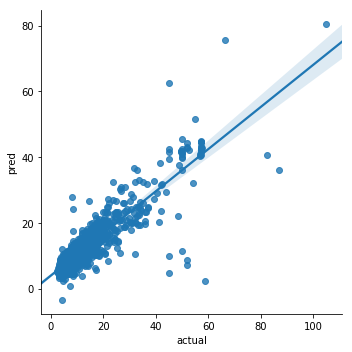

In [810]:
sns.lmplot(x='actual', y='pred', data = df_LR ,fit_reg = True)

In [811]:
#Random forest for regression
#Import libraries for RF
from sklearn.ensemble import RandomForestRegressor
# Train the model using the training sets
RFmodel = RandomForestRegressor(n_estimators=200,min_samples_leaf=5,random_state=0).fit(train_X, train_y)
# make the predictions by the model
RF_Predictions = RFmodel.predict(val_X)
# data frame for actual and predicted values
df_RF = pd.DataFrame({'actual': val_y, 'pred': RF_Predictions})
print(df_RF.head())
# Calculate and display accuracy
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs(( y_true - y_pred) / y_true))*100
    return mape

mape=MAPE(val_y,RF_Predictions)
accuracy = 100 - np.mean(mape) 
print("MEAN ABSOLUTE ERROR:"+str(mape)+"%")
print('Accuracy:', round(accuracy, 2), '%.')


   actual      pred
0     5.0  6.426116
1     8.0  9.677449
2     6.5  4.902457
3     3.7  4.123403
4     5.5  7.329475
MEAN ABSOLUTE ERROR:18.65273337278679%
Accuracy: 81.35 %.


In [818]:
#MEAN ABSOLUTE ERROR:18.65273337278679%
#Accuracy: 81.35 %

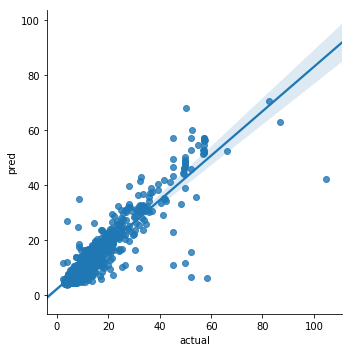

In [813]:
# df_RF.plot.scatter(x='actual', y='pred') 
sns.lmplot(x='actual', y='pred', data = df_RF ,fit_reg = True)


In [814]:
#random forrest will be best fit
#for test data lets predict fare
X_test=cab_data_test
print(X_test.columns)
print(X_test.shape)
print(X_test.dtypes)

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'week', 'month', 'year',
       'H_Distance', 'predicted_fare'],
      dtype='object')
(9829, 11)
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
week                   int64
month                  int64
year                   int64
H_Distance           float64
predicted_fare       float64
dtype: object


In [802]:
Regression =RandomForestRegressor(n_estimators=70,min_samples_leaf=5,random_state=0)
Regression.fit(X,Y)
# make the predictions by the model
y_test_pred=Regression.predict(X_test)
print(y_test_pred)
# data frame for predicted values
cab_data_test["predicted_fare"]=y_test_pred
cab_data_test.head()

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 11 

In [790]:
#output
cab_data_test.to_csv("py_output.csv", index= False)